#### Analyzing client will subscribe to term deposit or not using Portugal_Bank_Marketing dataset. 

Performed the following tasks: <br>

**A.**	Primary analysis of Categorical features and draws meaningful insights. <br>

**B.**	Performed the following Exploratory Data Analysis: <br>
1. Missing Value Analysis <br>
2. Label Encoding wherever required <br>
3. Selecting important features based on Random Forest<br>
4. Handling unbalanced data using SMOTE<br>
5. Standardize the data using the Standard Scalar provided by sklearn<br>

**C.** Build the following Supervised Learning models:<br>
1. Logistic Regression<br>
2. AdaBoost<br>
3. Naïve Bayes<br>
4. KNN<br>
5. SVM<br>

**D.** Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not <br> 

<b> ********************************************************************************************************************************************************************************* </b>

In [1]:
# Importing Necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the data 
df = pd.read_csv('bank.csv', sep=';')

In [5]:
# Checking our data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Checking shape of our data 
print(f"No. of Rows: {df.shape[0]}\nNo. of Columns: {df.shape[1]}")

No. of Rows: 41188
No. of Columns: 21


In [9]:
# Checking information about features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# Checking data type of our data 
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Let's Check what does the primary analysis of several categorical features reveal.

In [15]:
# Separating Categorical and numerical columns

cat_cols = df.dtypes[df.dtypes == 'object'].index
num_cols = df.dtypes[df.dtypes != 'object'].index

print(cat_cols)
print()
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [16]:
# y is our target variable so let's check it first 
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

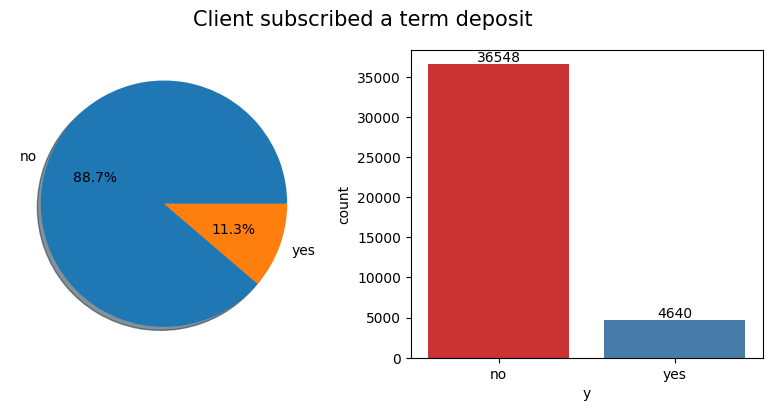

In [18]:
plt.figure(figsize=(10,4))
plt.suptitle('Client subscribed a term deposit', fontsize = 15)
plt.subplot(1,2,1)
plt.pie(df['y'].value_counts(), autopct='%1.1f%%', labels = df['y'].value_counts().index, shadow= True)


plt.subplot(1,2,2)
ax = sns.countplot(x = 'y', data= df, palette="Set1")
ax.bar_label(ax.containers[0])
plt.show()

From above we can clearly see that our Target Variable is imbalance. Only 11.3% are Yes and 88.7% are No.

#### Let's check other categorical variables<br>

In [23]:
# Checking unique values in other categorical columns
for i in cat_cols[:-1]:
    print(f"No. of Unique values in {i} : {df[i].nunique()}")
    print(df[i].unique())
    print('*'* 80)

No. of Unique values in job : 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
********************************************************************************
No. of Unique values in marital : 4
['married' 'single' 'divorced' 'unknown']
********************************************************************************
No. of Unique values in education : 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
********************************************************************************
No. of Unique values in default : 3
['no' 'unknown' 'yes']
********************************************************************************
No. of Unique values in housing : 3
['no' 'yes' 'unknown']
********************************************************************************
No. of Unique values in loan : 3
['no' 'yes' 'unknown']
*******

In [53]:
# Creating udf to plot our categorical columns
def count_plot(column):
    print('Value Counts for', column)
    print(df[column].value_counts())
    sns.countplot(y = df[column], hue = df['y'])
    plt.title(f"Distribution of {column} wrt Deposit")
    plt.show()

Value Counts for job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


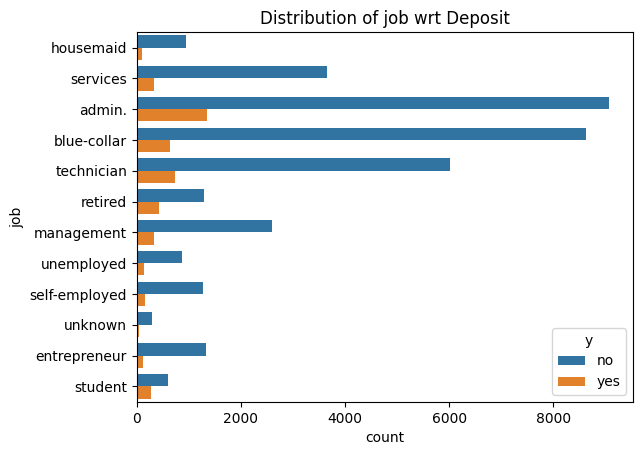

In [54]:
count_plot('job')

Value Counts for marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


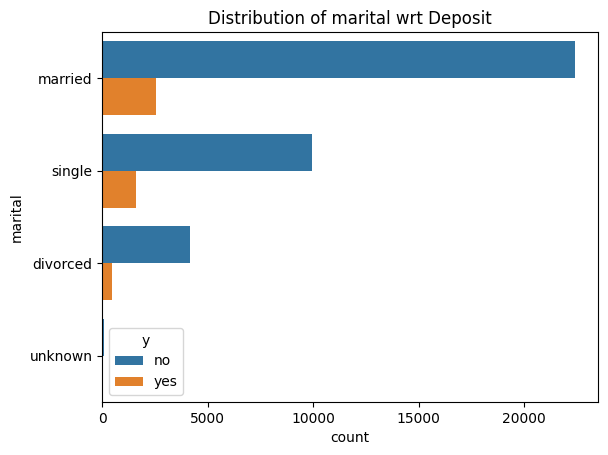

In [55]:
count_plot('marital')

Value Counts for education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


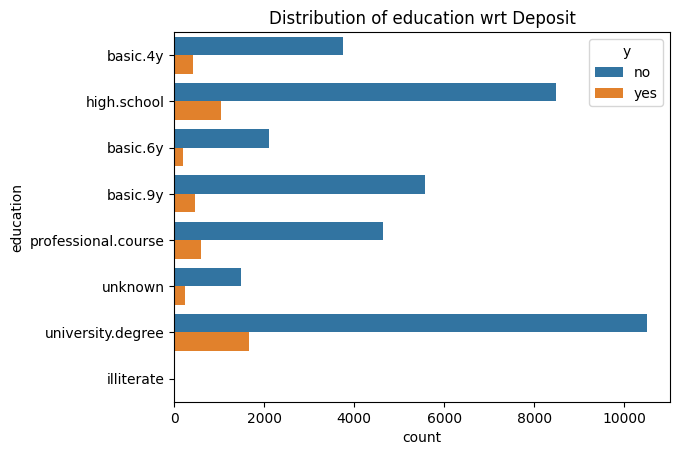

In [56]:
count_plot('education')

Value Counts for housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


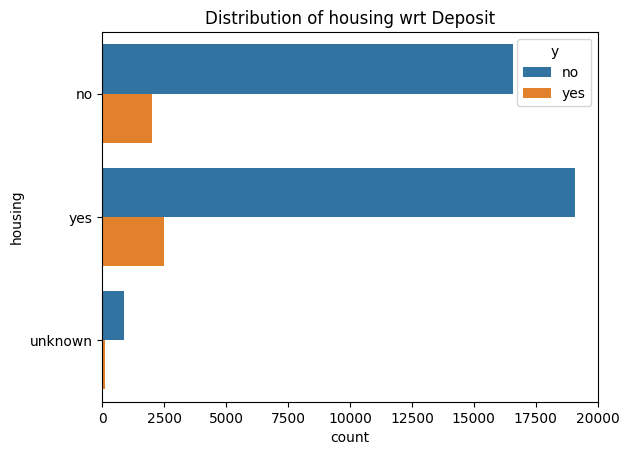

In [57]:
count_plot('housing')

Value Counts for loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


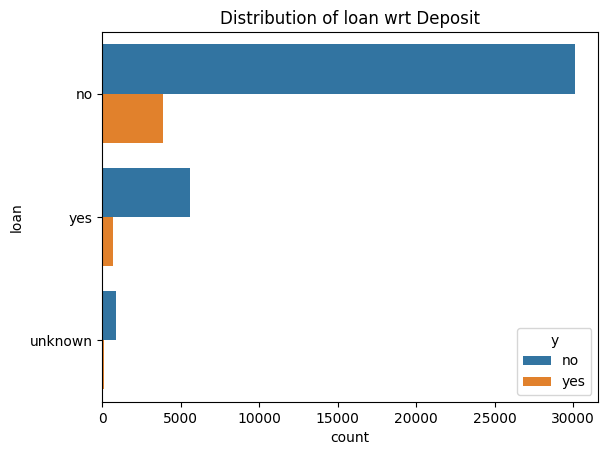

In [59]:
count_plot('loan')

Value Counts for contact
cellular     26144
telephone    15044
Name: contact, dtype: int64


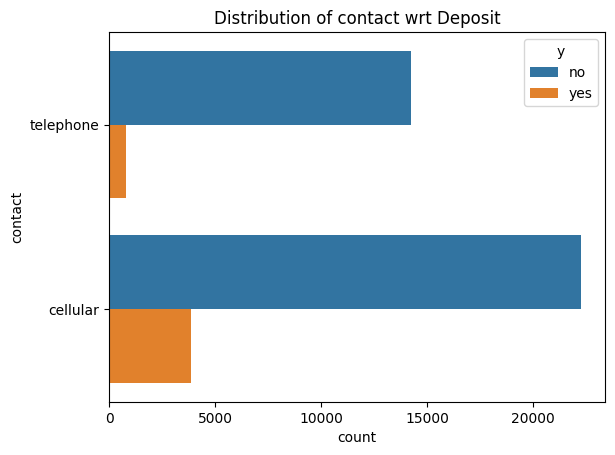

In [60]:
count_plot('contact')

#### Primary analysis of several categorical features:
1. As our data is imbalanced, we can see count for person don't have Terms Deposit is more. 
2. Admin staff have opened highest no. of term deposit. Followed by technician, blue-collar, technician and services staff. 
   Studends have lowest no. of term deposit
3. Married person have taken more no. of Terms deposit. Singles also have good no. of count for having Term Deposit
4. Education affects the awareness of Terms Deposit importance. Rate of taking terms deposit is more in Educated people compared to less or uneducated one.  
5. Having housing loan or not does not impact the decision of taking Terms deposite more.  
6. Seems person having loan not able to save more so less no. of terms deposite. 
7. Effective communication channel for marketing is cellular 

### Now let's clean our data 

#### a. Handling Null and Duplicate values 

In [68]:
# Checking null values and duplicate values 
print(f'Null value counts:\n{df.isnull().sum()}')
print()
print(f'Duplicate counts:\n{df.duplicated().sum()}')


Null value counts:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Duplicate counts:
12


Our data does not have null values but we have some duplicated values. So will drop them 

In [69]:
df.drop_duplicates(inplace= True)

In [70]:
df.duplicated().sum()

0

#### Checking the correlation 

C:\Users\BAPS\AppData\Local\Temp\ipykernel_12732\1794028829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


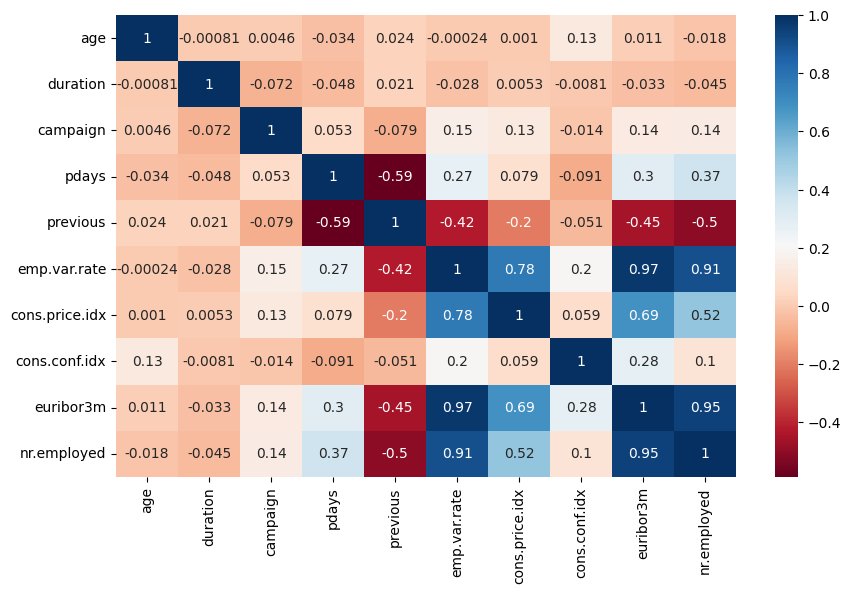

In [88]:
corr = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

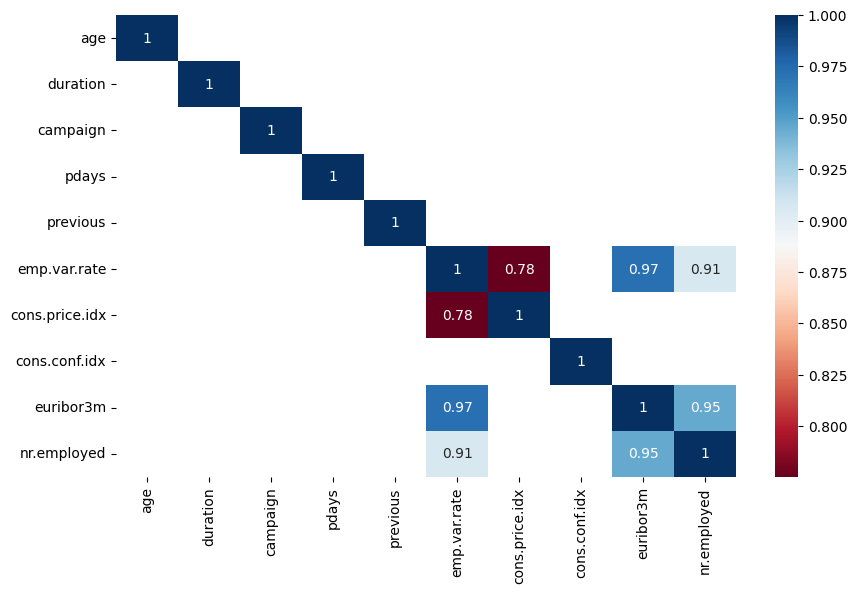

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(corr[abs(corr)>0.7], annot=True, cmap='RdBu')
plt.show()

Higly correlated features are:<br>
Emp.var.rate have high correlation with cons.price.idx, euriborn3m and nr.employed<br>
Euribor3m have high correlation with nr.employed

#### b. Encoding Categorical Columns

In [81]:
# Let's deal with columns having 3 or less categories. Finding the columns having less than 3 categories 
less_cat = []
for i in cat_cols:
    if df[i].nunique()<= 3:
        less_cat.append(i)
        
print(less_cat)

['default', 'housing', 'loan', 'contact', 'poutcome', 'y']


In [85]:
# Let's check the value counts for this columns

for i in less_cat:
    print('Value Count for', i)
    print( df[i].value_counts())
    print("*" * 40)

Value Count for default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
****************************************
Value Count for housing
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
****************************************
Value Count for loan
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64
****************************************
Value Count for contact
cellular     26135
telephone    15041
Name: contact, dtype: int64
****************************************
Value Count for poutcome
nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64
****************************************
Value Count for y
no     36537
yes     4639
Name: y, dtype: int64
****************************************


In [90]:
# Let's Treat the above columns using .map function to map the values 
df.default = df.default.map({'no': 0, 'unknown': 1, 'yes': 1}).astype('uint8')
df.housing = df.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
df.loan = df.loan.map({'yes': 1, 'unknown': 1, 'no' : 0}).astype('uint8')
df.contact = df.contact.map({'cellular': 1, 'telephone': 0}).astype('uint8') 
df.poutcome = df.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

In [93]:
# Let's Convert our target variable into numeric
df.y = df.y.map({'no':0, 'yes':1})

In [94]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default             uint8
housing             uint8
loan                uint8
contact             uint8
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            uint8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [96]:
# Remaining categorical columns are 
rem_cat = df.dtypes[df.dtypes == 'object'].index
rem_cat

Index(['job', 'marital', 'education', 'month', 'day_of_week'], dtype='object')

In [102]:
df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [104]:
# Let's convert unknown to unemployed
df['job'] = df['job'].replace('unknown','basic')
df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
unemployed        1344
housemaid         1060
student            875
Name: job, dtype: int64

In [106]:
df['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [107]:
# here we can replace the unknown with single
df['marital'] = df['marital'].replace('unknown','single')
df['marital'].value_counts()

married     24921
single      11644
divorced     4611
Name: marital, dtype: int64

In [108]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [109]:
# Here we can replace 'basic.9y','basic.6y','basic.4y' with basic & unknown with illiterate
df['education'] = df['education'].replace(['basic.9y','basic.6y','basic.4y'],'basic')
df['education'] = df['education'].replace('unknown','illiterate')
df['education'].value_counts()

basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
illiterate              1748
Name: education, dtype: int64

In [110]:
# Now will encode the categorical columns

df_dumm = pd.get_dummies(data= df, columns= rem_cat, drop_first= True)

df_dumm

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,0,0,261,1,999,0,0,...,0,0,1,0,0,0,1,0,0,0
1,57,1,0,0,0,149,1,999,0,0,...,0,0,1,0,0,0,1,0,0,0
2,37,0,1,0,0,226,1,999,0,0,...,0,0,1,0,0,0,1,0,0,0
3,40,0,0,0,0,151,1,999,0,0,...,0,0,1,0,0,0,1,0,0,0
4,56,0,0,1,0,307,1,999,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,1,334,1,999,0,0,...,0,0,0,1,0,0,0,0,0,0
41184,46,0,0,0,1,383,1,999,0,0,...,0,0,0,1,0,0,0,0,0,0
41185,56,0,1,0,1,189,2,999,0,0,...,0,0,0,1,0,0,0,0,0,0
41186,44,0,0,0,1,442,1,999,0,0,...,0,0,0,1,0,0,0,0,0,0


### Splitting data into x and y

In [111]:
x = df_dumm.drop('y', axis=1)
y = df_dumm['y']

print(x.shape)
print(y.shape)

(41176, 44)
(41176,)


### Separating train and test data 

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28823, 44)
(28823,)
(12353, 44)
(12353,)


#### c. Feature selection with Random Forest 

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [118]:
# Building the Model 
rf = RandomForestClassifier(random_state= 0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [119]:
# Checking the feature importance 
imp_feat = pd.Series(rf.feature_importances_, index= x.columns) 
imp_feat = imp_feat.sort_values(ascending= False)

imp_feat

duration                         0.305218
euribor3m                        0.111063
age                              0.088165
nr.employed                      0.053742
campaign                         0.042946
pdays                            0.031177
poutcome                         0.024015
emp.var.rate                     0.022337
cons.price.idx                   0.022306
cons.conf.idx                    0.020764
housing                          0.020418
previous                         0.017113
loan                             0.014346
education_university.degree      0.014066
marital_married                  0.013690
education_high.school            0.012620
marital_single                   0.012123
day_of_week_mon                  0.011976
day_of_week_thu                  0.011951
day_of_week_wed                  0.011866
day_of_week_tue                  0.011805
job_technician                   0.011018
contact                          0.010570
education_professional.course    0

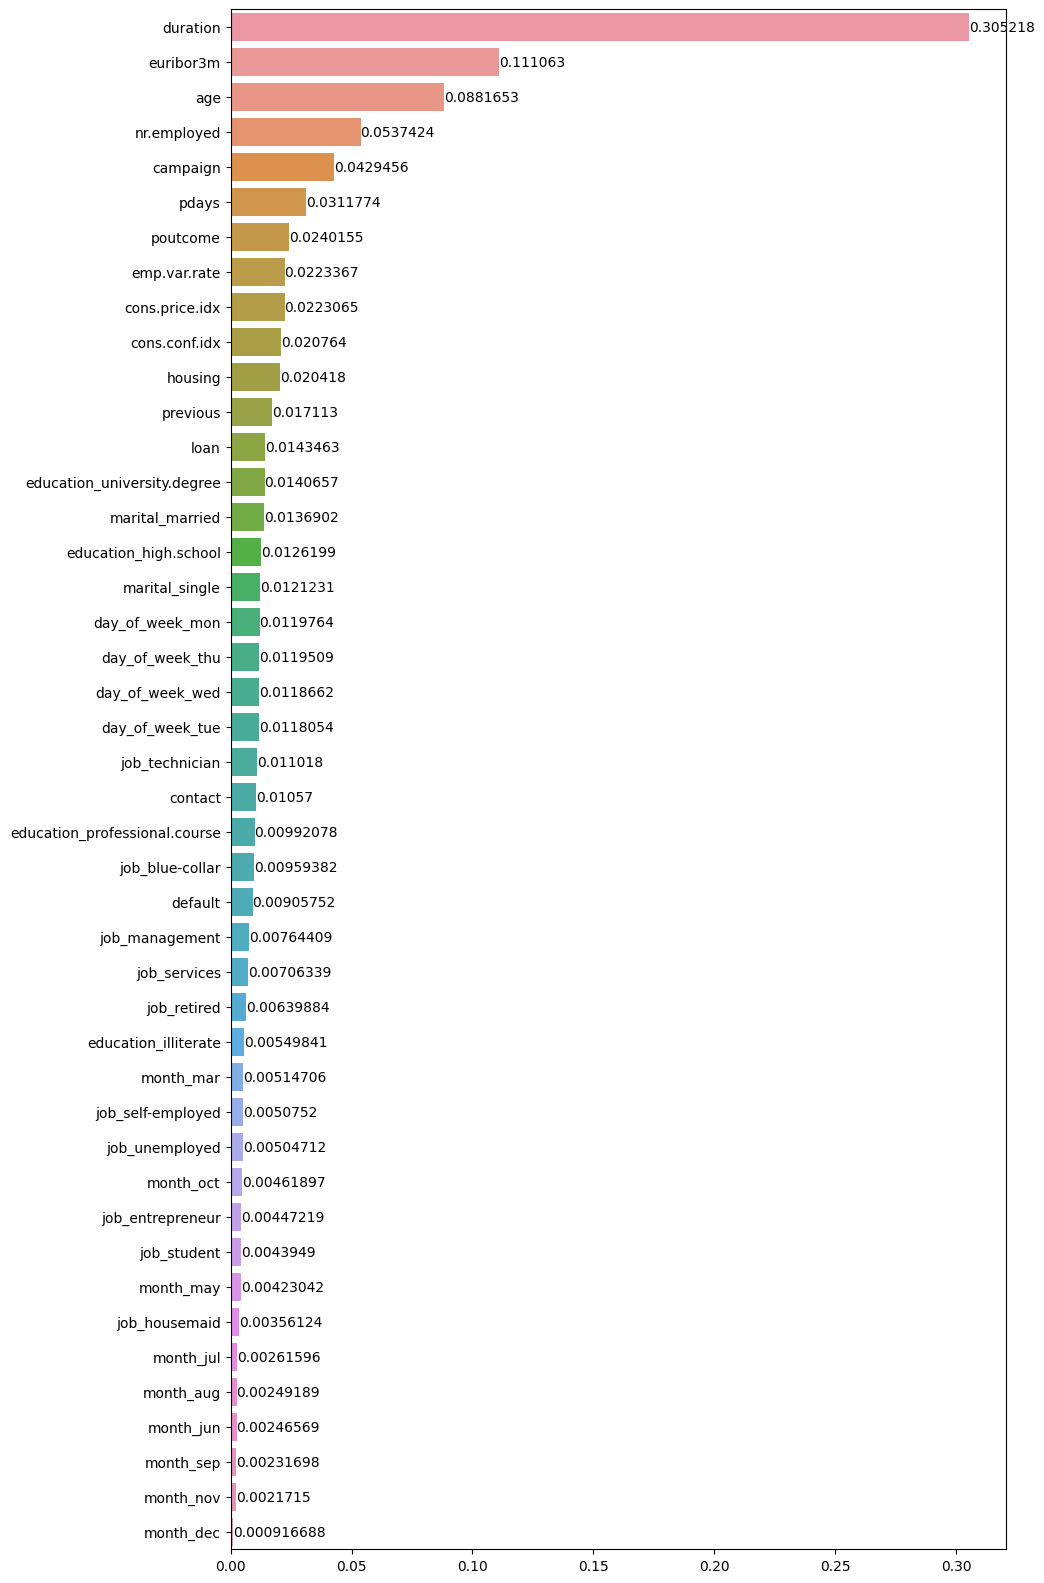

In [147]:
# Barplot for important features 
plt.figure(figsize=(10,20))
ax = sns.barplot(x= imp_feat.values, y= imp_feat.index)
ax.bar_label(ax.containers[0])
plt.show()

In [123]:
# Model for extracting features 
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [126]:
# Finding the best features 
selected_feat= x.columns[(sel.get_support())]
len(selected_feat)

8

In [128]:
# Best features are 
selected_feat

Index(['age', 'duration', 'campaign', 'pdays', 'poutcome', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

### d. Handling Imbalance Data 

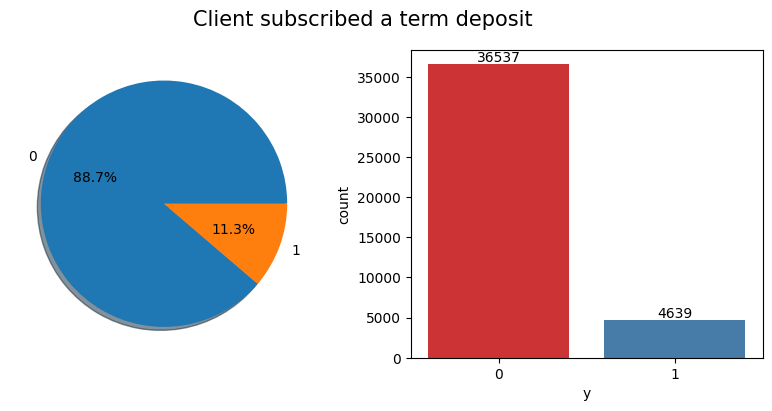

In [129]:
plt.figure(figsize=(10,4))
plt.suptitle('Client subscribed a term deposit', fontsize = 15)
plt.subplot(1,2,1)
plt.pie(df['y'].value_counts(), autopct='%1.1f%%', labels = df['y'].value_counts().index, shadow= True)


plt.subplot(1,2,2)
ax = sns.countplot(x = 'y', data= df, palette="Set1")
ax.bar_label(ax.containers[0])
plt.show()

From above we can see that our data is higly imbalanced. <br>
To avoid this we will use oversamplying technique SMOTE

In [131]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({0: 36537, 1: 4639})
Counter({0: 36537, 1: 36537})


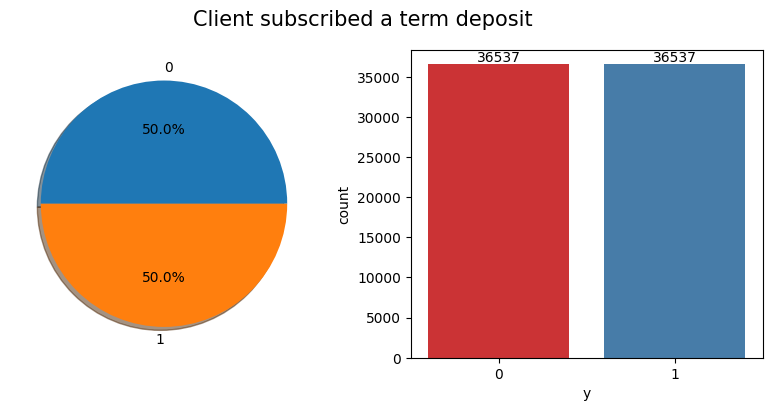

In [137]:
plt.figure(figsize=(10,4))
plt.suptitle('Client subscribed a term deposit', fontsize = 15)
plt.subplot(1,2,1)
plt.pie(y.value_counts(), autopct='%1.1f%%', labels = y.value_counts().index, shadow= True)


plt.subplot(1,2,2)
ax = sns.countplot(x = y, data= x, palette="Set1")
ax.bar_label(ax.containers[0])
plt.show()

### e. Standardize the data 

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
sc = StandardScaler()

In [141]:
x = sc.fit_transform(x)

In [142]:
print(x.shape)
print(y.shape)

(73074, 44)
(73074,)


In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(51151, 44)
(51151,)
(21923, 44)
(21923,)


### Supervised Learning Model Building  

### 1. Logistic Regression 

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [171]:
# Let's define a function for model evaluation 

def model_eval(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    print('Train Score', model.score(x_train, y_train))
    print('Test Score', model.score(x_test, y_test))
    ypred = model.predict(x_test)
    print(ypred)
    cm = confusion_matrix(y_test, ypred)
    print(cm)
    print(classification_report(y_test, ypred))
    cm_df = pd.DataFrame(data = cm, columns= ['Actual Positive: 1', 'Actual Negative: 0'], 
                     index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(data=cm_df, annot=True, fmt='d', cmap= 'RdBu')
    plt.show()

In [172]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression()

In [208]:
y_pred = lr.predict(x_test)

Train Score 0.9316142401908076
Test Score 0.9331752041235233
[0 1 1 ... 1 1 0]
[[10327   702]
 [  763 10131]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11029
           1       0.94      0.93      0.93     10894

    accuracy                           0.93     21923
   macro avg       0.93      0.93      0.93     21923
weighted avg       0.93      0.93      0.93     21923



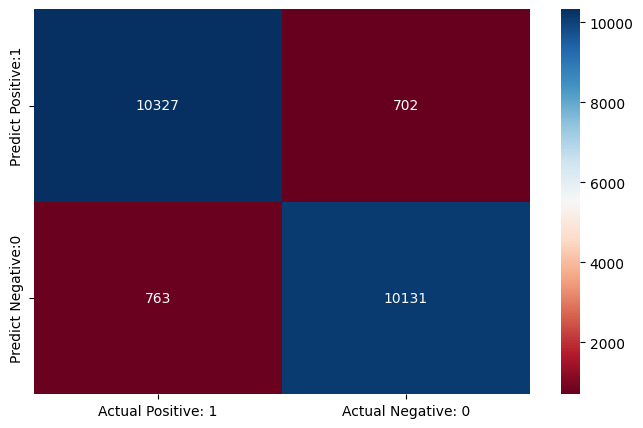

In [174]:
model_eval(lr, x_train, x_test, y_train, y_test)

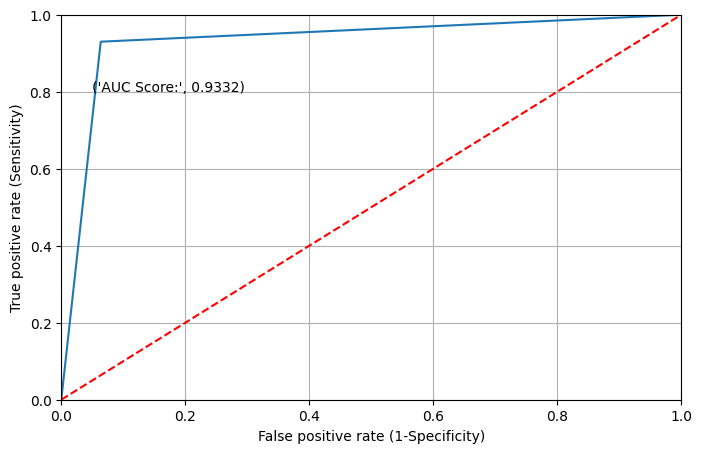

In [210]:
# ROC AUC Curve
plt.rcParams['figure.figsize']=(8,5)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [176]:
from sklearn import metrics
# create Datafram of results for all accuracy scores. Accuracy measures considered for model comparision are 
# 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

col = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

results = pd.DataFrame(columns = col)

results_Logreg = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})

results = results.append(results_Logreg , ignore_index = True)

results

C:\Users\BAPS\AppData\Local\Temp\ipykernel_12732\1866751892.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_Logreg , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.933156,0.935198,0.929961,0.933175,0.932572


### 2. Adaboost 

In [168]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(x_train, y_train)

AdaBoostClassifier(random_state=10)

In [179]:
ypred_ada = adaboost.predict(x_test)

Train Score 0.9294637445993236
Test Score 0.9309857227569219
[0 1 1 ... 1 1 0]
[[10278   751]
 [  762 10132]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11029
           1       0.93      0.93      0.93     10894

    accuracy                           0.93     21923
   macro avg       0.93      0.93      0.93     21923
weighted avg       0.93      0.93      0.93     21923



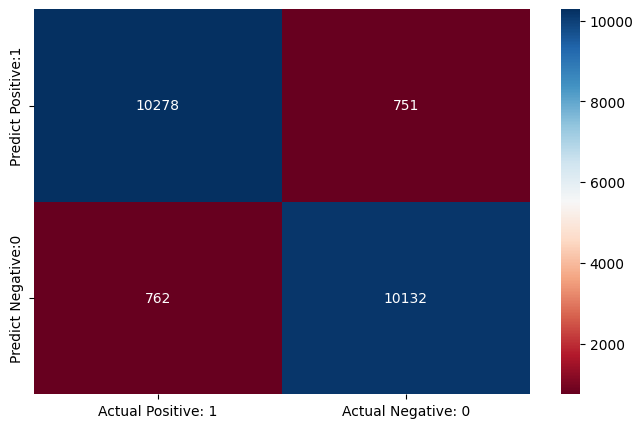

In [180]:
model_eval(adaboost, x_train, x_test, y_train, y_test)

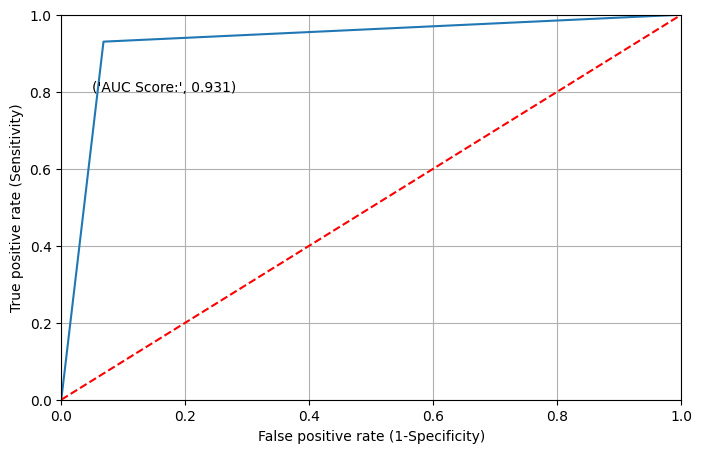

In [211]:
# ROC AUC Curve
plt.rcParams['figure.figsize']=(8,5)
fpr, tpr, thresholds = roc_curve(y_test, ypred_ada)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, ypred_ada),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [181]:
results_ada = pd.Series({'Model': "AdaBoost",
                     'AUC Score' : metrics.roc_auc_score(y_test, ypred_ada),
                 'Precision Score': metrics.precision_score(y_test, ypred_ada),
                 'Recall Score': metrics.recall_score(y_test, ypred_ada),
                 'Accuracy Score': metrics.accuracy_score(y_test, ypred_ada),
                  'f1-score':metrics.f1_score(y_test, ypred_ada)})

results = results.append(results_ada , ignore_index = True)

results

C:\Users\BAPS\AppData\Local\Temp\ipykernel_12732\3248189336.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_ada , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.933156,0.935198,0.929961,0.933175,0.932572
1,AdaBoost,0.930980,0.930993,0.930053,0.930986,0.930523


### 3. Naive Bayes

In [184]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [185]:
ypred_nb = gnb.predict(x_test)

Train Score 0.8794353971574358
Test Score 0.8810381790813301
[0 1 1 ... 1 1 0]
[[9872 1157]
 [1451 9443]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11029
           1       0.89      0.87      0.88     10894

    accuracy                           0.88     21923
   macro avg       0.88      0.88      0.88     21923
weighted avg       0.88      0.88      0.88     21923



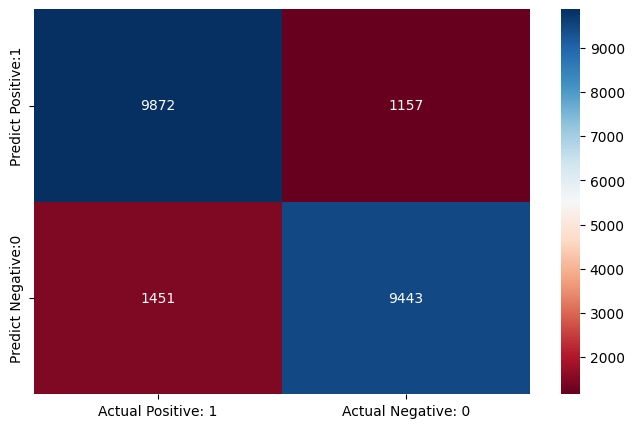

In [186]:
model_eval(gnb, x_train, x_test, y_train, y_test)

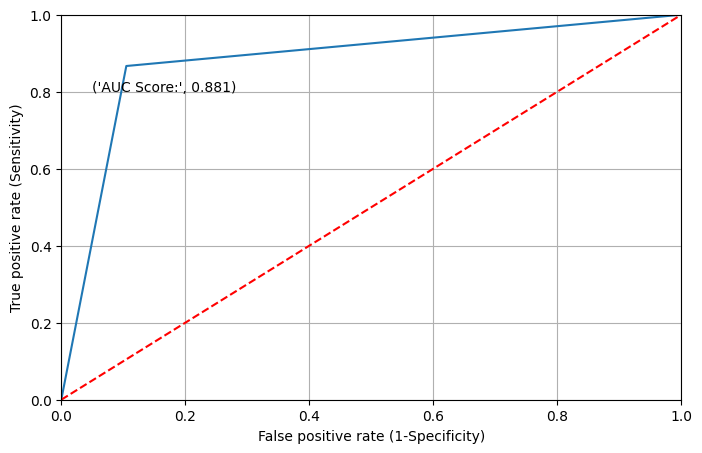

In [212]:
# ROC AUC Curve
plt.rcParams['figure.figsize']=(8,5)
fpr, tpr, thresholds = roc_curve(y_test, ypred_nb)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, ypred_nb),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [187]:
results_gnb = pd.Series({'Model': "Naive Bays",
                     'AUC Score' : metrics.roc_auc_score(y_test, ypred_nb),
                 'Precision Score': metrics.precision_score(y_test, ypred_nb),
                 'Recall Score': metrics.recall_score(y_test, ypred_nb),
                 'Accuracy Score': metrics.accuracy_score(y_test, ypred_nb),
                  'f1-score':metrics.f1_score(y_test, ypred_nb)})

results = results.append(results_gnb , ignore_index = True)

results

C:\Users\BAPS\AppData\Local\Temp\ipykernel_12732\2853520255.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_gnb , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.933156,0.935198,0.929961,0.933175,0.932572
1,AdaBoost,0.930980,0.930993,0.930053,0.930986,0.930523
2,Naive Bays,0.880951,0.890849,0.866807,0.881038,0.878664


### 4. KNN

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [194]:
# Let's Do Hyper Parameter Tunning 

from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(2, 6)}


In [195]:
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

In [196]:
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5])})

In [197]:
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [198]:
ypred_knn  = knn_gscv.predict(x_test)

Train Score 0.9565599890520224
Test Score 0.9261050038772066
[0 1 1 ... 1 1 0]
[[10279   750]
 [  870 10024]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     11029
           1       0.93      0.92      0.93     10894

    accuracy                           0.93     21923
   macro avg       0.93      0.93      0.93     21923
weighted avg       0.93      0.93      0.93     21923



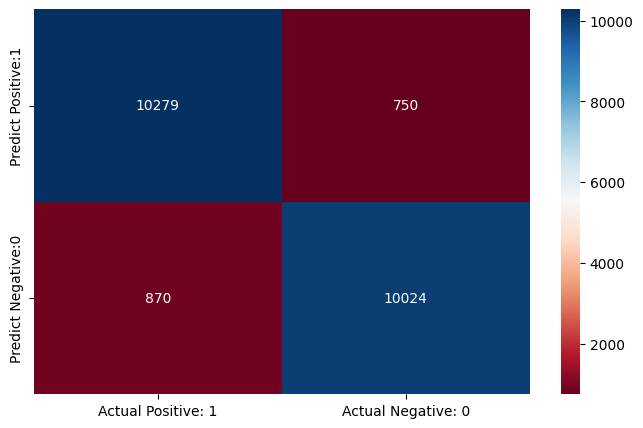

In [199]:
model_eval(knn_gscv, x_train, x_test, y_train, y_test)

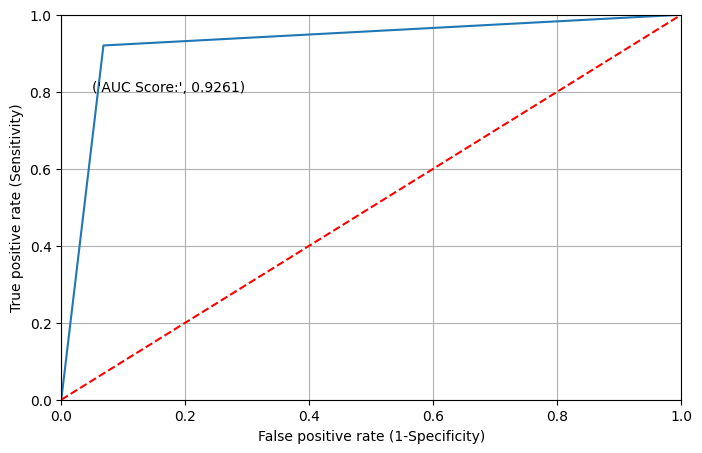

In [213]:
# ROC AUC Curve
plt.rcParams['figure.figsize']=(8,5)
fpr, tpr, thresholds = roc_curve(y_test, ypred_knn)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, ypred_knn),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [200]:
results_knn = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(y_test, ypred_knn),
                 'Precision Score': metrics.precision_score(y_test, ypred_knn),
                 'Recall Score': metrics.recall_score(y_test, ypred_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, ypred_knn),
                  'f1-score':metrics.f1_score(y_test, ypred_knn)})

results = results.append(results_knn , ignore_index = True)

results

C:\Users\BAPS\AppData\Local\Temp\ipykernel_12732\2252720360.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_knn , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.933156,0.935198,0.929961,0.933175,0.932572
1,AdaBoost,0.930980,0.930993,0.930053,0.930986,0.930523
2,Naive Bays,0.880951,0.890849,0.866807,0.881038,0.878664
3,KNN,0.926068,0.930388,0.920140,0.926105,0.925235


### 5. SVM

In [201]:
from sklearn.svm import SVC

In [202]:
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [205]:
ypred_svc = svclassifier.predict(x_test)

Train Score 0.9329631874254658
Test Score 0.9346804725630616
[0 1 1 ... 1 1 0]
[[10333   696]
 [  736 10158]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11029
           1       0.94      0.93      0.93     10894

    accuracy                           0.93     21923
   macro avg       0.93      0.93      0.93     21923
weighted avg       0.93      0.93      0.93     21923



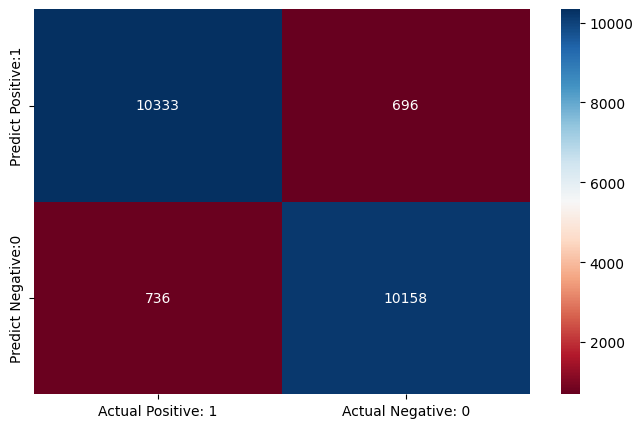

In [206]:
model_eval(svclassifier, x_train, x_test, y_train, y_test)

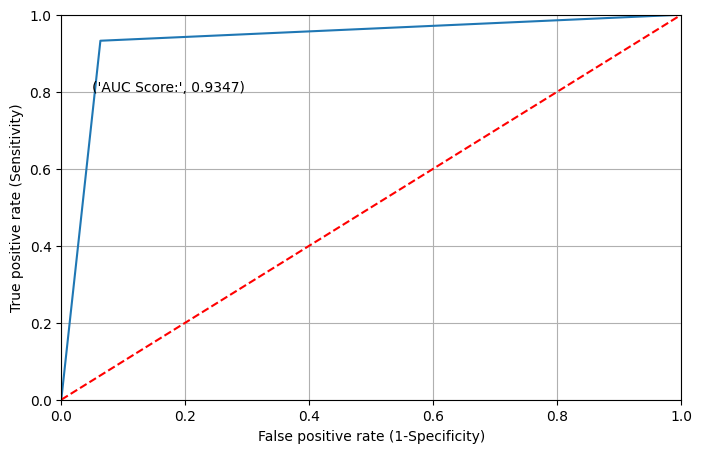

In [214]:
# ROC AUC Curve
plt.rcParams['figure.figsize']=(8,5)
fpr, tpr, thresholds = roc_curve(y_test, ypred_svc)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, ypred_svc),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [207]:
results_svm = pd.Series({'Model': "SVM",
                     'AUC Score' : metrics.roc_auc_score(y_test, ypred_svc),
                 'Precision Score': metrics.precision_score(y_test, ypred_svc),
                 'Recall Score': metrics.recall_score(y_test, ypred_svc),
                 'Accuracy Score': metrics.accuracy_score(y_test, ypred_svc),
                  'f1-score':metrics.f1_score(y_test, ypred_svc)})

results = results.append(results_svm , ignore_index = True)

results

C:\Users\BAPS\AppData\Local\Temp\ipykernel_12732\2546528362.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_svm , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.933156,0.935198,0.929961,0.933175,0.932572
1,AdaBoost,0.930980,0.930993,0.930053,0.930986,0.930523
2,Naive Bays,0.880951,0.890849,0.866807,0.881038,0.878664
3,KNN,0.926068,0.930388,0.920140,0.926105,0.925235
4,SVM,0.934667,0.935876,0.932440,0.934680,0.934155


### Model Comparision 

In [209]:
results

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.933156,0.935198,0.929961,0.933175,0.932572
1,AdaBoost,0.930980,0.930993,0.930053,0.930986,0.930523
2,Naive Bays,0.880951,0.890849,0.866807,0.881038,0.878664
3,KNN,0.926068,0.930388,0.920140,0.926105,0.925235
4,SVM,0.934667,0.935876,0.932440,0.934680,0.934155


#### From above result we can see that SVM is our most effecitve model followed by Logistic Regression 